<a href="https://colab.research.google.com/github/Georgitanev/j_post_scrape_py/blob/master/jobs_graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display
from IPython.core.display import HTML


file_path="/content/jobs_search_python.csv"
dataframe = pd.read_csv(file_path)
dataframe_5 = dataframe.head()
display(HTML(dataframe_5.to_html()))


,date_start,title,lst_keywords,len_keywords,link,extracted
0,17.08.2020,Software Developer with PHP or Python,"sql,python,php,go,cassandra,java",32,https://www.jobs.bg/5388240,True
1,17.08.2020,Senior Python Developer [REMOTE ROLE],"aws,spark,python,azure,scala,cassandra,etl,hadoop",49,https://www.jobs.bg/5399862,True
2,13.08.2020,Senior Software Developer Angular/React/ Vue/PHP/ Ruby/Python/ Node.js/React Native,"sql,aws,python,php,azure,ruby",29,https://www.jobs.bg/5397235,True
3,11.08.2020,Python Developer,"pandas,sql,aws,python",21,https://www.jobs.bg/5395523,True
4,10.08.2020,Back End Developer Python (microservices),"python,flask,aws,sql",20,https://www.jobs.bg/5393845,True


In [73]:
skills_dict_str = dataframe['lst_keywords']


def Convert(string):
    li = list(string.split(","))
    return li


# Driver code
skills_dict = []
for row in skills_dict_str:
    # print(row)
    row_list = Convert(row)
    skills_dict.append(row_list)

list_len = dataframe['lst_keywords'].shape[0]

dict = {}
for words in skills_dict:
    for word in words:
        if not word in dict:
            dict[word] = 1
        else:
            dict[word] += 1


df = pd.DataFrame()

df['Skill'] = list(dict.keys())
df['Count'] = list(dict.values())
list_len = dataframe['lst_keywords'].shape[0] # get the length of the list
df['Ranking'] = df['Count'] / list_len
df = df.sort_values(by=['Ranking'], ascending=False)
df_10 = df.head(n=10)
display(HTML(df_10.to_html()))


,Skill,Count,Ranking
1,python,281,0.992933
5,java,114,0.402827
0,sql,111,0.392226
6,aws,80,0.282686
25,bash,66,0.233216
21,c,66,0.233216
3,go,46,0.162544
8,azure,46,0.162544
26,shell,45,0.159011
24,c++,37,0.130742


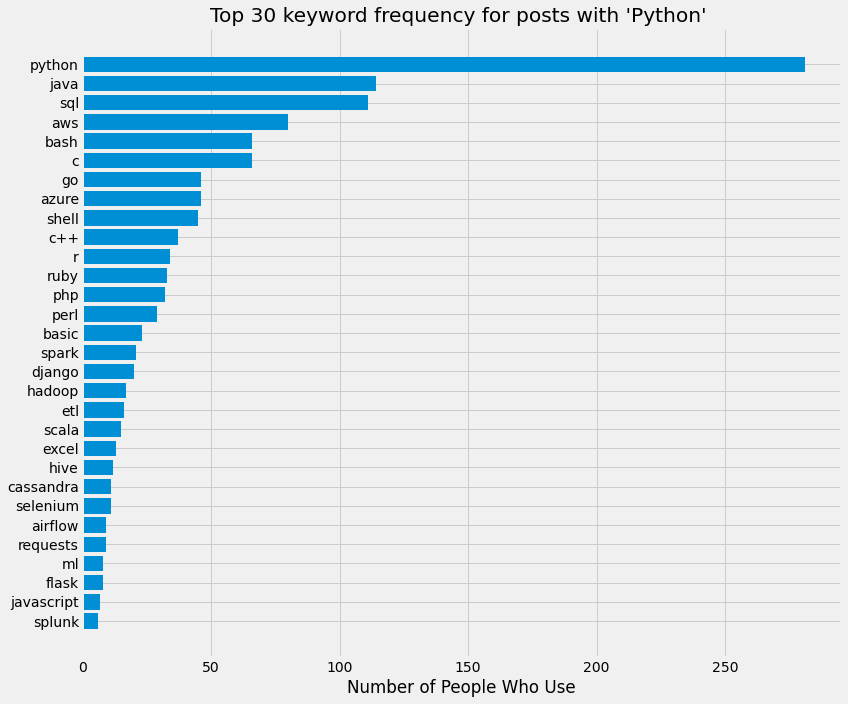

In [74]:
""" Graphics """

plt.style.use("fivethirtyeight")

df = df.head(30)
df = df.sort_values(by=['Ranking'], ascending=True)
figure = plt.gcf()
figure.set_size_inches(12, 10)

plt.barh(df['Skill'], df['Count'])
plt.title("Top 30 keyword frequency for posts with 'Python' ")
plt.xlabel("Number of People Who Use")
plt.tight_layout()
plt.rcParams["figure.figsize"] = (25, 4)
my_dpi = 96
plt.savefig('/content/python.png')
plt.show()

In [77]:
""" list of posts with 'Python in description' """
dataframe_list = dataframe[:20]
for row in dataframe_list.values.tolist():
  print(row)

['17.08.2020', 'Software Developer with PHP or Python', 'sql,python,php,go,cassandra,java', 32, 'https://www.jobs.bg/5388240', True]
['17.08.2020', 'Senior Python Developer [REMOTE ROLE]', 'aws,spark,python,azure,scala,cassandra,etl,hadoop', 49, 'https://www.jobs.bg/5399862', True]
['13.08.2020', 'Senior Software Developer Angular/React/ Vue/PHP/ Ruby/Python/ Node.js/React Native', 'sql,aws,python,php,azure,ruby', 29, 'https://www.jobs.bg/5397235', True]
['11.08.2020', 'Python Developer', 'pandas,sql,aws,python', 21, 'https://www.jobs.bg/5395523', True]
['10.08.2020', 'Back End Developer Python (microservices)', 'python,flask,aws,sql', 20, 'https://www.jobs.bg/5393845', True]
['30.07.2020', 'Python Developer', 'django,excel,flask,python', 25, 'https://www.jobs.bg/5383214', True]
['29.07.2020', 'Python Developer', 'python', 6, 'https://www.jobs.bg/5381983', True]
['28.07.2020', 'Software Developer Go/Python (Cyber Protect Team)', 'sql,python,r,rdbms,go,mssql', 27, 'https://www.jobs.bg/5

In [97]:
""" SQL section """
def filster_df(dataframe, word):

  df_slice = dataframe[dataframe['lst_keywords'].str.contains(word, na=False)]
  print(df_slice.shape[0])
  lst_keywords = df_slice['lst_keywords'].values.tolist()


  def Convert(string):
      li = list(string.split(","))
      return li


  # Driver code
  skills_dict = []
  for row in lst_keywords:
      # print(row)
      row_list = Convert(row)
      skills_dict.append(row_list)

  list_len = dataframe['lst_keywords'].shape[0]

  dict = {}
  for words in skills_dict:
      for word in words:
          if not word in dict:
              dict[word] = 1
          else:
              dict[word] += 1


  df = pd.DataFrame()

  df['Skill'] = list(dict.keys())
  df['Count'] = list(dict.values())
  list_len = dataframe['lst_keywords'].shape[0] # get the length of the list
  df['Ranking'] = df['Count'] / list_len
  df = df.sort_values(by=['Ranking'], ascending=False)
  df_10 = df.head(n=10)
  display(HTML(df_10.to_html()))
  return df, df_slice

df_keywords, df_slice = filster_df(dataframe, word='sql')

113


,Skill,Count,Ranking
1,python,113,0.399293
0,sql,111,0.392226
5,java,48,0.169611
6,aws,37,0.130742
7,azure,25,0.088339
17,c,22,0.077739
26,bash,21,0.074205
30,shell,21,0.074205
2,php,20,0.070671
3,go,18,0.063604


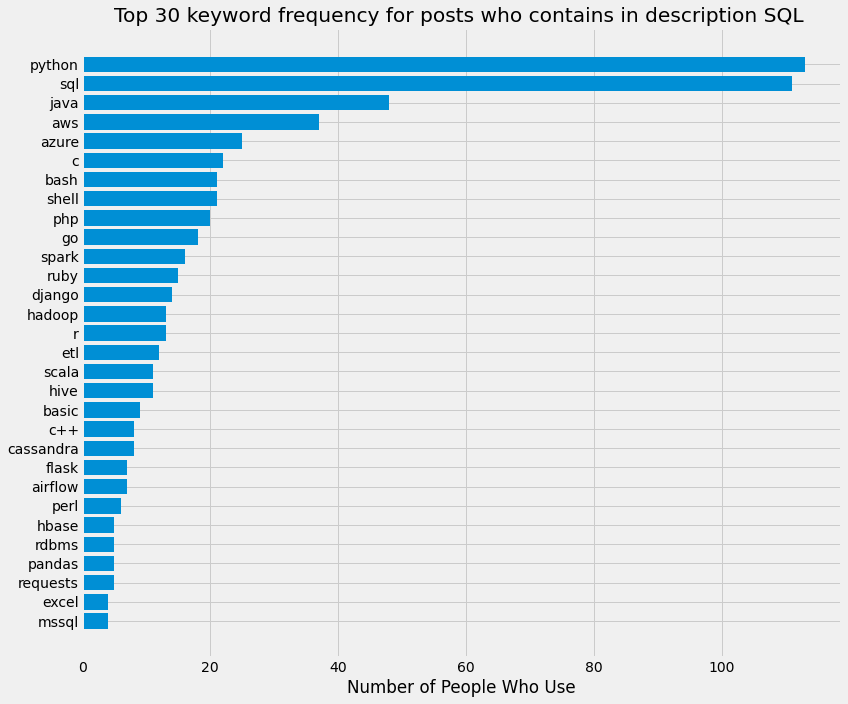

In [98]:
""" SQL Graphics """
def graphic(df, word):
  plt.style.use("fivethirtyeight")

  df = df.head(30)
  df = df.sort_values(by=['Ranking'], ascending=True)
  figure = plt.gcf()
  figure.set_size_inches(12, 10)

  plt.barh(df['Skill'], df['Count'])
  plt.title(f"Top 30 keyword frequency for posts who contains in description {word} ")
  plt.xlabel("Number of People Who Use")
  plt.tight_layout()
  plt.rcParams["figure.figsize"] = (25, 4)
  my_dpi = 96
  plt.savefig(f'/content/{word}.png')
  plt.show()
  return
graphic(df_keywords, word='SQL')

Posts with 'sql' in description


In [99]:
def posts(df_slice):
  dataframe_list = df_slice[:20]
  for row in dataframe_list.values.tolist():
    print(row)
  return
posts(df_slice)

['17.08.2020', 'Software Developer with PHP or Python', 'sql,python,php,go,cassandra,java', 32, 'https://www.jobs.bg/5388240', True]
['13.08.2020', 'Senior Software Developer Angular/React/ Vue/PHP/ Ruby/Python/ Node.js/React Native', 'sql,aws,python,php,azure,ruby', 29, 'https://www.jobs.bg/5397235', True]
['11.08.2020', 'Python Developer', 'pandas,sql,aws,python', 21, 'https://www.jobs.bg/5395523', True]
['10.08.2020', 'Back End Developer Python (microservices)', 'python,flask,aws,sql', 20, 'https://www.jobs.bg/5393845', True]
['28.07.2020', 'Software Developer Go/Python (Cyber Protect Team)', 'sql,python,r,rdbms,go,mssql', 27, 'https://www.jobs.bg/5381329', True]
['21.08.2020', 'Big Data Developer with Azure', 'sql,spark,aws,python,r,azure,scala,cassandra,ml,c,hbase,java,etl,hadoop', 71, 'https://www.jobs.bg/5405964', True]
['19.08.2020', 'Data Scientist', 'sas,sql,python,r,spss', 21, 'https://www.jobs.bg/5404010', True]
['19.08.2020', 'Big Data Engineer', 'hdfs,sql,spark,java,pytho

ETL dataset

*   Skills table with top 10 keywords by count in ETL dataset 
*   And graphic for ETL (*extract*, transform, load) containing in job 
*   description.






16


,Skill,Count,Ranking
2,python,16,0.056537
6,etl,16,0.056537
8,sql,11,0.038869
13,java,9,0.031802
15,airflow,8,0.028269
0,aws,7,0.024735
4,scala,7,0.024735
1,spark,7,0.024735
3,azure,6,0.021201
7,hadoop,6,0.021201


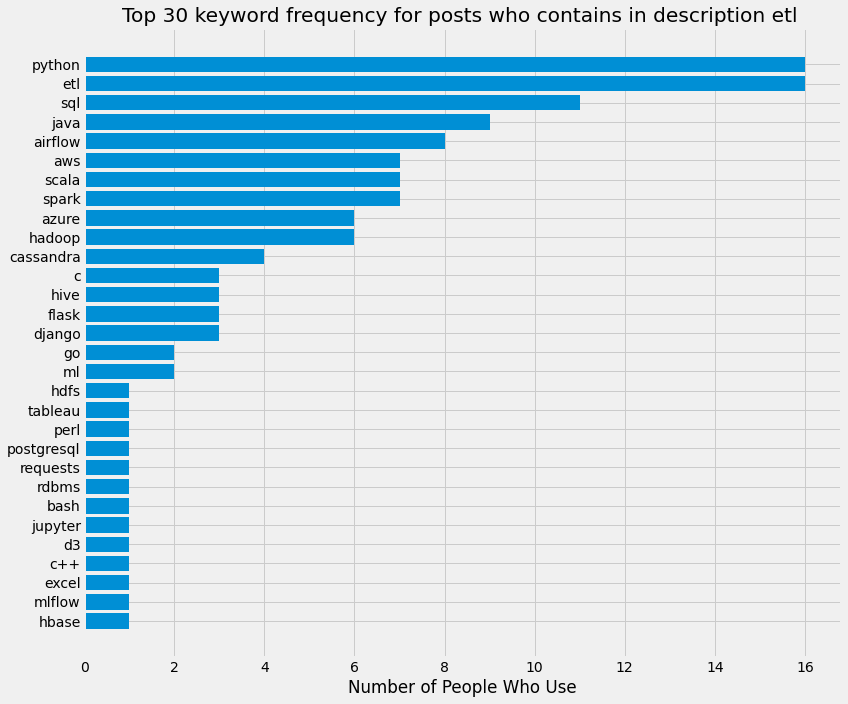

['17.08.2020', 'Senior Python Developer [REMOTE ROLE]', 'aws,spark,python,azure,scala,cassandra,etl,hadoop', 49, 'https://www.jobs.bg/5399862', True]
['21.08.2020', 'Big Data Developer with Azure', 'sql,spark,aws,python,r,azure,scala,cassandra,ml,c,hbase,java,etl,hadoop', 71, 'https://www.jobs.bg/5405964', True]
['31.07.2020', 'Data Engineer', 'hdfs,spark,airflow,jupyter,python,mlflow,go,ml,java,etl', 55, 'https://www.jobs.bg/5384492', True]
['30.07.2020', 'Data Engineer', 'sql,spark,airflow,java,python,excel,scala,c++,etl', 49, 'https://www.jobs.bg/5383258', True]
['21.08.2020', 'Senior Data Engineer', 'azure,hive,scala,sql,etl,python,go', 34, 'https://www.jobs.bg/5405757', True]
['12.08.2020', 'Data Architect  (Data Governance)', 'aws,d3,etl,python', 17, 'https://www.jobs.bg/5397107', True]
['14.08.2020', 'Python Developer - ETL', 'postgresql,airflow,etl,python', 29, 'https://www.jobs.bg/5392580', True]
['18.08.2020', 'QA Automation Engineer', 'sql,etl,java,aws,python', 23, 'https://

In [86]:
df_keywords, df_slice = filster_df(dataframe, word='etl')
graphic(df_keywords, word='etl')
posts(df_slice)
# """ etl """
# df_3 = df1[df1['keywords'].str.contains("etl", na=False)]
# print(f'Number of rows: {df_3.shape[0]}')
# print(df_3)
# """ etl """

Job posts with 'bash' in description

66


,Skill,Count,Ranking
2,python,66,0.233216
4,bash,66,0.233216
0,aws,29,0.102473
7,sql,20,0.070671
5,shell,19,0.067138
1,perl,18,0.063604
6,azure,18,0.063604
9,java,18,0.063604
8,c,11,0.038869
16,go,10,0.035336


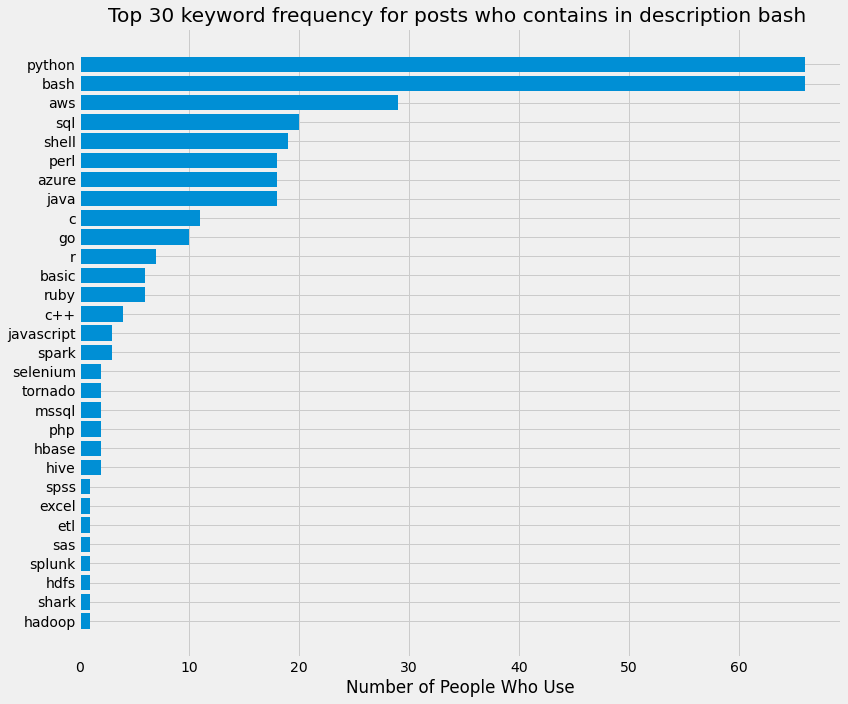

['20.08.2020', 'DevOps Engineer (AWS)', 'aws,perl,python,ruby,bash,shell', 31, 'https://www.jobs.bg/5404935', True]
['19.08.2020', 'DevOps Engineer', 'azure,bash,aws,python', 21, 'https://www.jobs.bg/5403848', True]
['17.08.2020', 'Senior Web Administrator', 'bash,sql,python', 15, 'https://www.jobs.bg/5401322', True]
['17.08.2020', 'DevOps Engineer', 'aws,perl,python,azure,ruby,c,bash,java,shell', 44, 'https://www.jobs.bg/5400035', True]
['14.08.2020', 'DevSecOps Engineer', 'aws,python,c,bash,swift', 23, 'https://www.jobs.bg/5398640', True]
['12.08.2020', 'Automation Developer', 'c++,haskell,python,c,bash,java', 30, 'https://www.jobs.bg/5397199', True]
['12.08.2020', 'Linux Engineers for global international consulting company', 'python,bash,perl', 16, 'https://www.jobs.bg/5392265', True]
['10.08.2020', 'DevOps Engineer', 'aws,python,bash,java,shell', 26, 'https://www.jobs.bg/5394024', True]
['10.08.2020', 'QA Engineer', 'python,bash,selenium,javascript,tornado', 39, 'https://www.jobs.

In [106]:
def visualisation_info(dataframe, word):
  df_keywords, df_slice = filster_df(dataframe, word)
  graphic(df_keywords,word)
  posts(df_slice)
  return
visualisation_info(dataframe, word='bash')


In [95]:
no_dev_ops = dataframe[~dataframe['title'].str.contains("DevOps|DEVOPS", na=False)]
print(f'Number of posts with no DevOps in title: {no_dev_ops.shape[0]}')
dataframe_5 = no_dev_ops.head()
display(HTML(dataframe_5.to_html()))

Number of posts with no DevOps in title: 235


,date_start,title,lst_keywords,len_keywords,link,extracted
0,17.08.2020,Software Developer with PHP or Python,"sql,python,php,go,cassandra,java",32,https://www.jobs.bg/5388240,True
1,17.08.2020,Senior Python Developer [REMOTE ROLE],"aws,spark,python,azure,scala,cassandra,etl,hadoop",49,https://www.jobs.bg/5399862,True
2,13.08.2020,Senior Software Developer Angular/React/ Vue/PHP/ Ruby/Python/ Node.js/React Native,"sql,aws,python,php,azure,ruby",29,https://www.jobs.bg/5397235,True
3,11.08.2020,Python Developer,"pandas,sql,aws,python",21,https://www.jobs.bg/5395523,True
4,10.08.2020,Back End Developer Python (microservices),"python,flask,aws,sql",20,https://www.jobs.bg/5393845,True


80


,Skill,Count,Ranking
0,aws,80,0.282686
2,python,80,0.282686
8,sql,37,0.130742
3,azure,33,0.116608
17,java,33,0.116608
21,bash,29,0.102473
18,go,21,0.074205
10,ruby,18,0.063604
22,shell,15,0.053004
15,c,13,0.045936


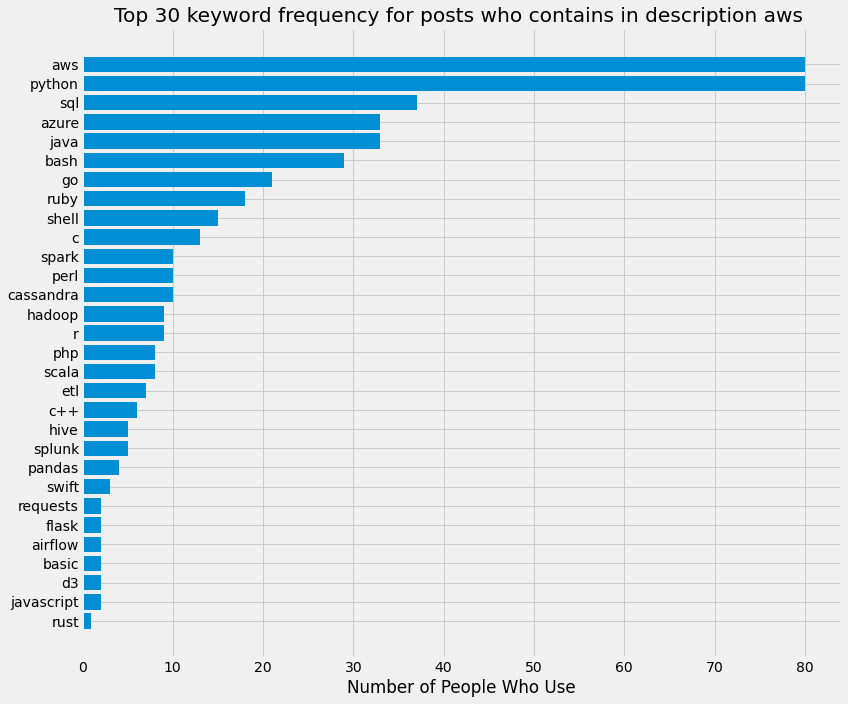

['17.08.2020', 'Senior Python Developer [REMOTE ROLE]', 'aws,spark,python,azure,scala,cassandra,etl,hadoop', 49, 'https://www.jobs.bg/5399862', True]
['13.08.2020', 'Senior Software Developer Angular/React/ Vue/PHP/ Ruby/Python/ Node.js/React Native', 'sql,aws,python,php,azure,ruby', 29, 'https://www.jobs.bg/5397235', True]
['11.08.2020', 'Python Developer', 'pandas,sql,aws,python', 21, 'https://www.jobs.bg/5395523', True]
['10.08.2020', 'Back End Developer Python (microservices)', 'python,flask,aws,sql', 20, 'https://www.jobs.bg/5393845', True]
['21.08.2020', 'Big Data Developer with Azure', 'sql,spark,aws,python,r,azure,scala,cassandra,ml,c,hbase,java,etl,hadoop', 71, 'https://www.jobs.bg/5405964', True]
['20.08.2020', 'Senior Backend Software Engineer', 'java,aws,python,r,go,c++', 24, 'https://www.jobs.bg/5405316', True]
['20.08.2020', 'DevOps Engineer (AWS)', 'aws,perl,python,ruby,bash,shell', 31, 'https://www.jobs.bg/5404935', True]
['19.08.2020', 'DevOps Engineer', 'azure,bash,aw

In [107]:
visualisation_info(dataframe, word='aws')

20


,Skill,Count,Ranking
0,django,20,0.070671
3,python,20,0.070671
4,sql,14,0.049470
2,flask,6,0.021201
14,c,5,0.017668
10,java,5,0.017668
18,etl,3,0.010601
17,airflow,3,0.010601
21,basic,2,0.007067
12,php,2,0.007067


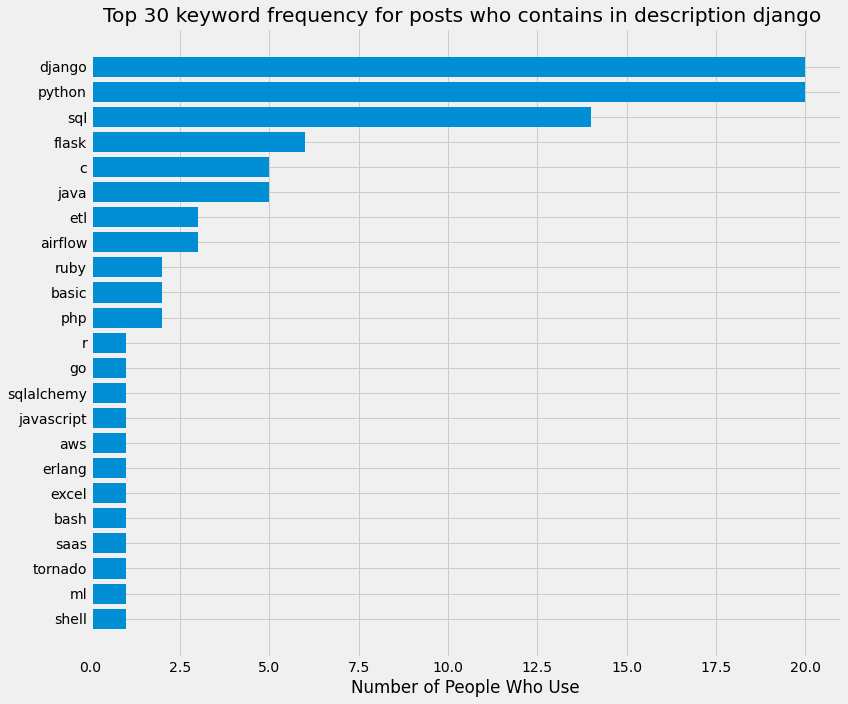

['30.07.2020', 'Python Developer', 'django,excel,flask,python', 25, 'https://www.jobs.bg/5383214', True]
['17.08.2020', 'Lead Back-end Engineer', 'django,python', 13, 'https://www.jobs.bg/5401670', True]
['11.08.2020', 'Senior Software Engineer - Backend', 'sql,python,go,ml,django', 23, 'https://www.jobs.bg/5388043', True]
['14.08.2020', 'Python Back-end Engineer', 'django,python', 13, 'https://www.jobs.bg/5399361', True]
['30.07.2020', 'Senior Python Developer', 'django,sql,python', 17, 'https://www.jobs.bg/5383059', True]
['28.07.2020', 'Back-End Python Developer', 'tornado,django,sql,saas,flask,bash,python', 41, 'https://www.jobs.bg/5381067', True]
['05.08.2020', 'Head of Product Development', 'django,sql,python', 17, 'https://www.jobs.bg/5389332', True]
['07.08.2020', 'Python Developer Intern', 'django,python,java', 18, 'https://www.jobs.bg/5391424', True]
['21.08.2020', 'React Native Developer', 'aws,django,sql,python', 21, 'https://www.jobs.bg/5405917', True]
['06.08.2020', 'Full

In [108]:
visualisation_info(dataframe, word='django')

8


,Skill,Count,Ranking
0,python,8,0.028269
1,flask,8,0.028269
3,sql,7,0.024735
4,django,6,0.021201
11,airflow,3,0.010601
12,etl,3,0.010601
2,aws,2,0.007067
10,shell,2,0.007067
13,c,2,0.007067
5,excel,1,0.003534


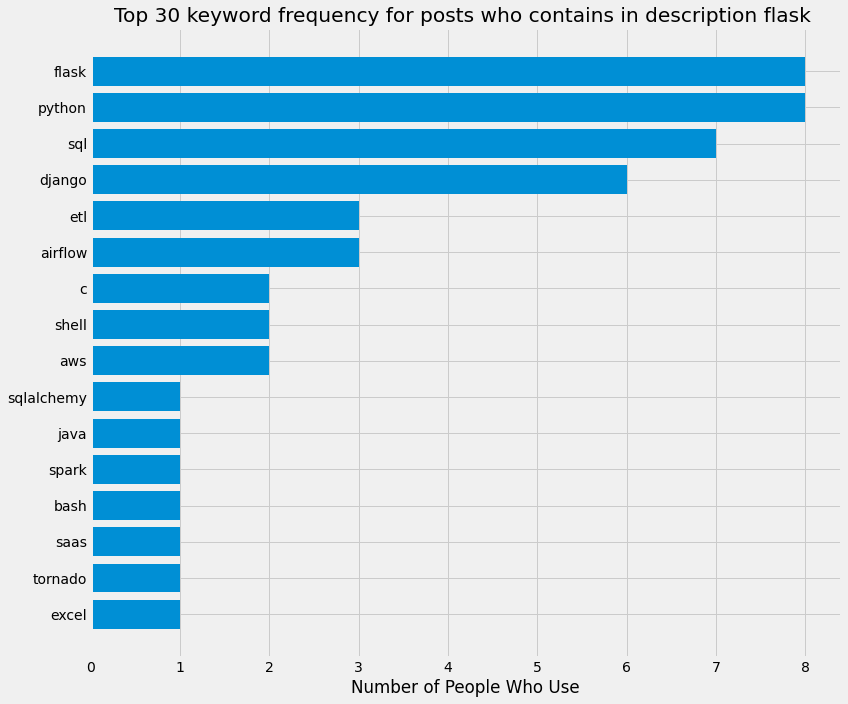

['10.08.2020', 'Back End Developer Python (microservices)', 'python,flask,aws,sql', 20, 'https://www.jobs.bg/5393845', True]
['30.07.2020', 'Python Developer', 'django,excel,flask,python', 25, 'https://www.jobs.bg/5383214', True]
['28.07.2020', 'Back-End Python Developer', 'tornado,django,sql,saas,flask,bash,python', 41, 'https://www.jobs.bg/5381067', True]
['07.08.2020', 'Machine Learning Engineer', 'spark,sql,flask,aws,shell,python', 32, 'https://www.jobs.bg/5392079', True]
['14.08.2020', 'Python Developer', 'airflow,django,sql,etl,flask,python', 35, 'https://www.jobs.bg/5392052', True]
['14.08.2020', 'Програмист, извличане на данни', 'airflow,c,django,sql,etl,flask,python', 37, 'https://www.jobs.bg/5391938', True]
['14.08.2020', 'Програмист, управление на бази данни', 'airflow,c,django,sql,etl,flask,python', 37, 'https://www.jobs.bg/5391937', True]
['17.08.2020', 'Full Stack Python Developer', 'django,sql,flask,java,sqlalchemy,shell,python', 45, 'https://www.jobs.bg/5401083', True]


In [109]:
visualisation_info(dataframe, word='flask')

0


,Skill,Count,Ranking


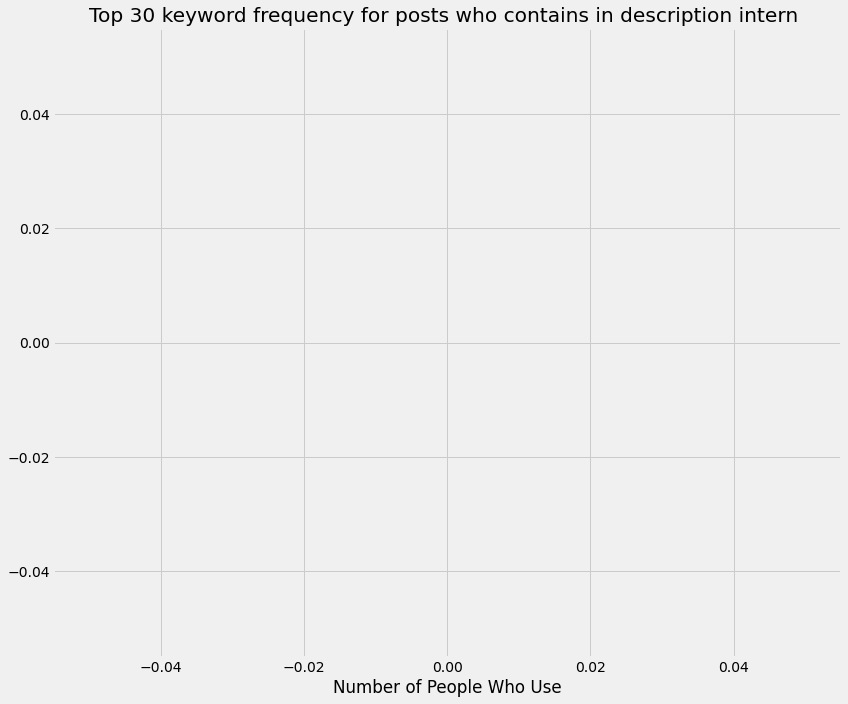

5
Number of posts with Data in title: 5


,date_start,title,lst_keywords,len_keywords,link,extracted
32,12.08.2020,Linux Engineers for global international consulting company,"python,bash,perl",16,https://www.jobs.bg/5392265,True
149,07.08.2020,Python Developer Intern,"django,python,java",18,https://www.jobs.bg/5391424,True
164,07.08.2020,Research Analyst - Quantitative and Data Processing Internship,"excel,python",12,https://www.jobs.bg/5392046,True
165,07.08.2020,Mobile Developer Intern,"kotlin,c,python,java",20,https://www.jobs.bg/5391431,True
251,11.08.2020,Intern/Junior Front End Developer,"php,python,java",15,https://www.jobs.bg/5394854,True


In [132]:
visualisation_info(dataframe, word='intern') # no posts for now
""" it's not exact match """
dataframe_some = dataframe[dataframe['title'].str.contains("Intern|intern", na=False)] # phrase is case sensitive //TODO appropriate filtration
print(dataframe_some.shape[0])
print(f'Number of posts with Data in title: {dataframe_some.shape[0]}')
dataframe_5 = dataframe_some.head()
display(HTML(dataframe_5.to_html()))

0


,Skill,Count,Ranking


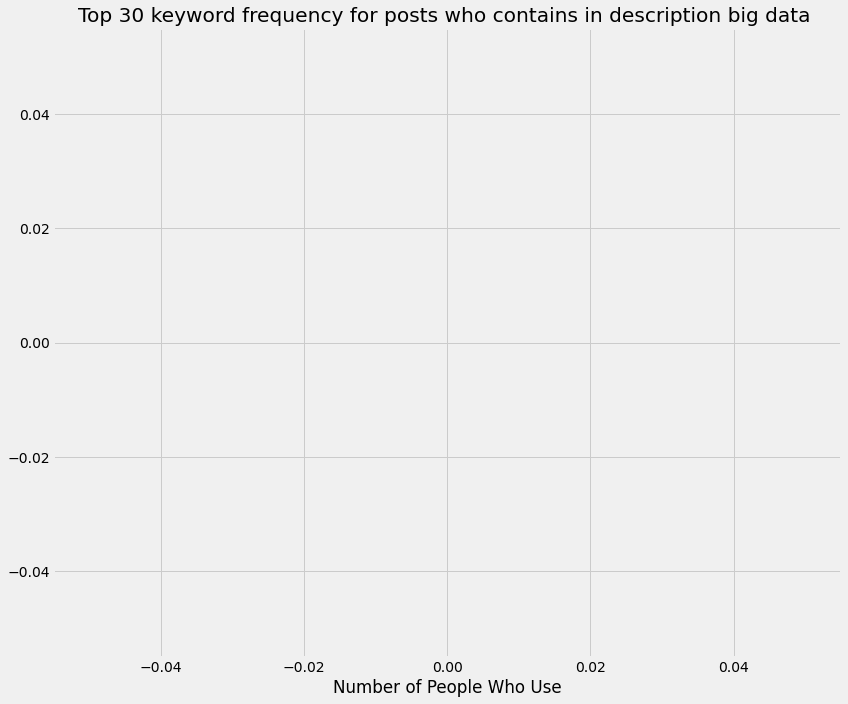

In [114]:
visualisation_info(dataframe, word='big data') # not working (probably because it's a phrase - TODO phrases in dict)

In [122]:
dataframe_big_d = dataframe[dataframe['title'].str.contains("Big Data|BigData", na=False)] # phrase is case sensitive //TODO appropriate filtration
print(dataframe_big_d.shape[0])
print(f'Number of posts with Big Data in title: {dataframe_big_d.shape[0]}')
dataframe_5 = dataframe_big_d.head()
display(HTML(dataframe_5.to_html()))

4
Number of posts with Big Data in title: 4


,date_start,title,lst_keywords,len_keywords,link,extracted
8,21.08.2020,Big Data Developer with Azure,"sql,spark,aws,python,r,azure,scala,cassandra,ml,c,hbase,java,etl,hadoop",71,https://www.jobs.bg/5405964,True
13,19.08.2020,Big Data Engineer,"hdfs,sql,spark,java,python,go,hbase,hive,flume,hadoop",53,https://www.jobs.bg/5403863,True
21,17.08.2020,Big Data Engineer,"hdfs,sql,spark,java,python,go,hbase,hive,flume,hadoop",53,https://www.jobs.bg/5400845,True
180,24.07.2020,BigData developer,"azure,sql,python",16,https://www.jobs.bg/5377963,True


In [121]:
dataframe_big_d = dataframe[dataframe['title'].str.contains("Data|data", na=False)] # phrase is case sensitive //TODO appropriate filtration
print(dataframe_big_d.shape[0])
print(f'Number of posts with Data in title: {dataframe_big_d.shape[0]}')
dataframe_5 = dataframe_big_d.head()
display(HTML(dataframe_5.to_html()))

27
Number of posts with Data in title: 27


,date_start,title,lst_keywords,len_keywords,link,extracted
8,21.08.2020,Big Data Developer with Azure,"sql,spark,aws,python,r,azure,scala,cassandra,ml,c,hbase,java,etl,hadoop",71,https://www.jobs.bg/5405964,True
12,19.08.2020,Data Scientist,"sas,sql,python,r,spss",21,https://www.jobs.bg/5404010,True
13,19.08.2020,Big Data Engineer,"hdfs,sql,spark,java,python,go,hbase,hive,flume,hadoop",53,https://www.jobs.bg/5403863,True
21,17.08.2020,Big Data Engineer,"hdfs,sql,spark,java,python,go,hbase,hive,flume,hadoop",53,https://www.jobs.bg/5400845,True
24,14.08.2020,Data Engineering and Machine Learning Manager,"sql,python,scala,ml,java",24,https://www.jobs.bg/5399449,True


In [124]:
df_3 = dataframe[dataframe['title'].str.contains("Python", na=False)]
print(df_3.shape[0])
dataframe_5 = df_3.head()
display(HTML(dataframe_5.to_html()))

41


,date_start,title,lst_keywords,len_keywords,link,extracted
0,17.08.2020,Software Developer with PHP or Python,"sql,python,php,go,cassandra,java",32,https://www.jobs.bg/5388240,True
1,17.08.2020,Senior Python Developer [REMOTE ROLE],"aws,spark,python,azure,scala,cassandra,etl,hadoop",49,https://www.jobs.bg/5399862,True
2,13.08.2020,Senior Software Developer Angular/React/ Vue/PHP/ Ruby/Python/ Node.js/React Native,"sql,aws,python,php,azure,ruby",29,https://www.jobs.bg/5397235,True
3,11.08.2020,Python Developer,"pandas,sql,aws,python",21,https://www.jobs.bg/5395523,True
4,10.08.2020,Back End Developer Python (microservices),"python,flask,aws,sql",20,https://www.jobs.bg/5393845,True


In [125]:
""" without python in title """
df_3 = dataframe[~dataframe['title'].str.contains("Python", na=False)]
print(df_3.shape[0])
dataframe_5 = df_3.head()
display(HTML(dataframe_5.to_html()))

242


,date_start,title,lst_keywords,len_keywords,link,extracted
8,21.08.2020,Big Data Developer with Azure,"sql,spark,aws,python,r,azure,scala,cassandra,ml,c,hbase,java,etl,hadoop",71,https://www.jobs.bg/5405964,True
9,21.08.2020,Senior IP Network Engineer,"r,python,perl",13,https://www.jobs.bg/5405841,True
10,20.08.2020,Senior Backend Software Engineer,"java,aws,python,r,go,c++",24,https://www.jobs.bg/5405316,True
11,20.08.2020,DevOps Engineer (AWS),"aws,perl,python,ruby,bash,shell",31,https://www.jobs.bg/5404935,True
12,19.08.2020,Data Scientist,"sas,sql,python,r,spss",21,https://www.jobs.bg/5404010,True


In [126]:
""" Without DevOps in title """
df_3 = dataframe[~dataframe['title'].str.contains("DevOps", na=False)]
print(df_3.shape[0])
dataframe_5 = df_3.head()
display(HTML(dataframe_5.to_html()))

238


,date_start,title,lst_keywords,len_keywords,link,extracted
0,17.08.2020,Software Developer with PHP or Python,"sql,python,php,go,cassandra,java",32,https://www.jobs.bg/5388240,True
1,17.08.2020,Senior Python Developer [REMOTE ROLE],"aws,spark,python,azure,scala,cassandra,etl,hadoop",49,https://www.jobs.bg/5399862,True
2,13.08.2020,Senior Software Developer Angular/React/ Vue/PHP/ Ruby/Python/ Node.js/React Native,"sql,aws,python,php,azure,ruby",29,https://www.jobs.bg/5397235,True
3,11.08.2020,Python Developer,"pandas,sql,aws,python",21,https://www.jobs.bg/5395523,True
4,10.08.2020,Back End Developer Python (microservices),"python,flask,aws,sql",20,https://www.jobs.bg/5393845,True


In [128]:
""" Without C java php C# """
df_3 = dataframe[~dataframe['title'].str.contains('C|java|Java|JAVA|php|Php|PHP|C#')] # case sensitive
print(df_3.shape[0])
dataframe_5 = df_3.head()
display(HTML(dataframe_5.to_html()))

216


,date_start,title,lst_keywords,len_keywords,link,extracted
1,17.08.2020,Senior Python Developer [REMOTE ROLE],"aws,spark,python,azure,scala,cassandra,etl,hadoop",49,https://www.jobs.bg/5399862,True
3,11.08.2020,Python Developer,"pandas,sql,aws,python",21,https://www.jobs.bg/5395523,True
4,10.08.2020,Back End Developer Python (microservices),"python,flask,aws,sql",20,https://www.jobs.bg/5393845,True
5,30.07.2020,Python Developer,"django,excel,flask,python",25,https://www.jobs.bg/5383214,True
6,29.07.2020,Python Developer,python,6,https://www.jobs.bg/5381983,True
